In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name
case = 'Aquaplanet'

# path to ocean month file
# path_month = '/data/darr/MOM6_cases/aquaplanet/coupled-xgrid/502yr/05010101.ocean_month.nc'
# dm = xr.open_dataset(path_month, decode_times=True)

# path to ocean month file
path_month = '/data/darr/510yr/05000101.ocean_month.nc'
dm_ocean = xr.open_dataset(path_month, decode_times=True)

# # path to ocean month file
# path_month = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ocean_month.nc'
# dm = xr.open_dataset(path_month, decode_times=True)

# # path to ice month file
# path_month_ice = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ice_month.nc'
# dice = xr.open_dataset(path_month_ice, decode_times=True)

# path to ice month file
path_ice = '/data/darr/510yr/05000101.ice_month.nc'
dice = xr.open_dataset(path_ice, decode_times=True)

# path to atmos month file 
path_atmos = '/data/darr/510yr/05000101.atmos_month.nc'
d_atmos = xr.open_dataset(path_atmos, decode_times=True)

# path to flux month file
path_flux = '/data/darr/510yr/05000101.flux_month.nc'
d_flux = xr.open_dataset(path_flux, decode_times=True)



/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [6]:
def plot_surface(case, name):
    sst = case['tos'].mean(dim='Time')
    sss = case['sos'].mean(dim='Time')
    ssh = case['ssh'].mean(dim='Time')

    b = np.linspace(0, 20, 21, endpoint=True)
    t = np.linspace(0, 20, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sst, b, 
             cmap='magma', extend='both',transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SST.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sst, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[C]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SST_section.png')
    plt.show()

    b_salt = np.linspace(34, 36, 21, endpoint=True)
    t_salt = np.linspace(34, 36, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sss, b_salt, 
             cmap='BrBG_r', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sss, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[psu]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SSS_section.png')
    plt.show()

    b_ssh = np.linspace(-10, 10, 21, endpoint=True)
    t_ssh = np.linspace(-10, 10, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], ssh, b_ssh, 
             cmap='PRGn', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_ssh, boundaries=t_ssh, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[m]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSH'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()
    return


def calculate_global_sfn(vmo, vhGM):
    vmo_slice = (np.nanmean(vmo[-31:-1,:,:,:], axis=0))
    vhGM_slice = (np.nanmean(vhGM[-31:-1,:,:,:], axis=0))
    sfn_global_resmean = (np.cumsum(np.nansum(vmo_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_res = (np.cumsum(np.nansum(vhGM_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_mean = sfn_global_resmean - sfn_global_res
    return sfn_global_mean, sfn_global_res, sfn_global_resmean

def variablename(*arg):
    names = []
    for i in range(len(arg)):
        item = [tpl[0] for tpl in filter(lambda x: arg[i] is x[1], globals().items())]
        names.append(item)
    str(names).strip('[]')
    return names

def plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, y_south, y_north):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    sname = str(names[2]).strip("['']")
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dm.yq, dm.zl, sfn_list[row], b, cmap='RdBu_r', extend='both')
        ax.invert_yaxis()
        ax.set_xlim(-np.abs(y_south), y_north)
        plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.savefig(fig_path+'{}_global.png'.format(sname))
    plt.show()
    return


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


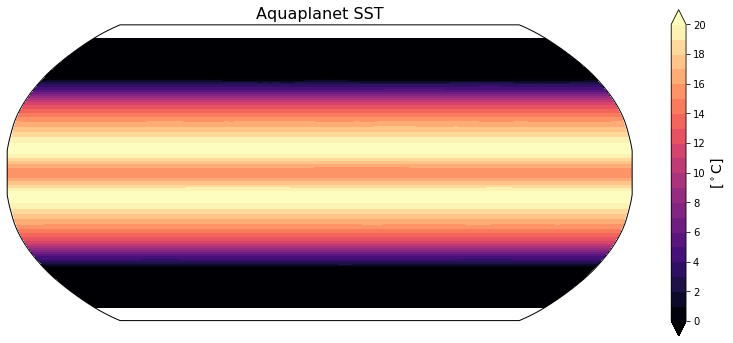

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


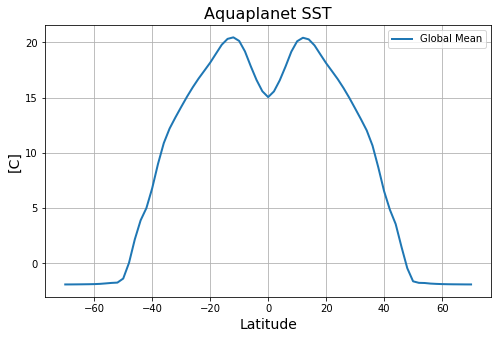

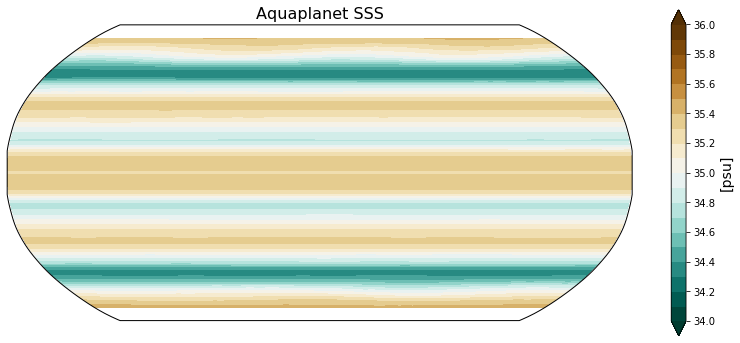

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


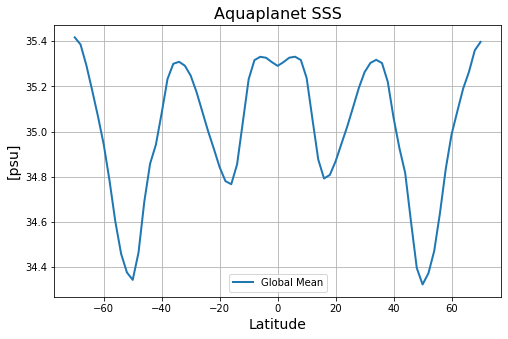

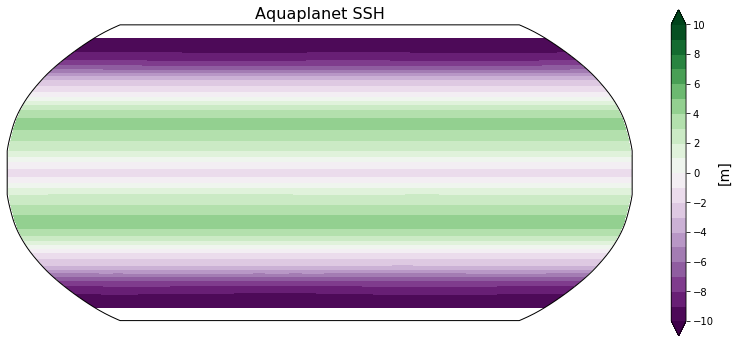

In [7]:
plot_surface(dm_ocean, case)

In [8]:
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean, sfn_res, sfn_resmean = calculate_global_sfn(dm.vmo, dm.vhGM)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice


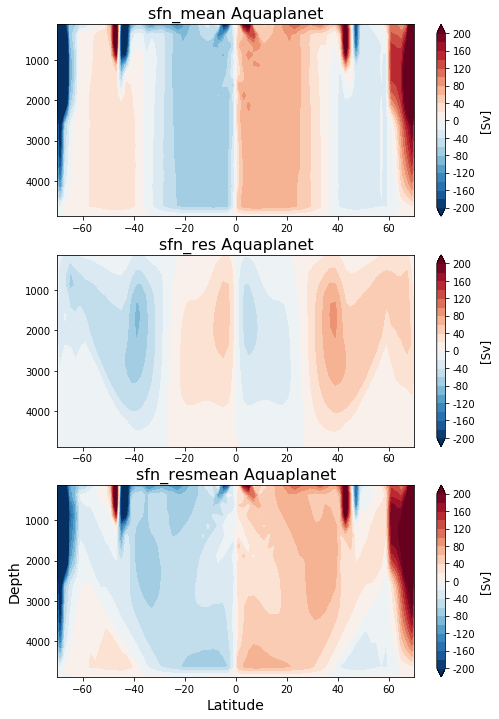

In [9]:
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, 200, -70, 70)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


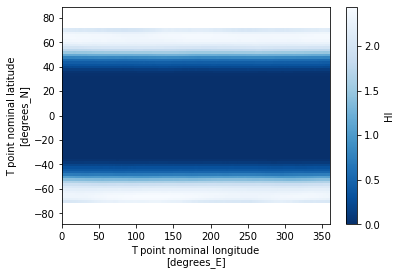

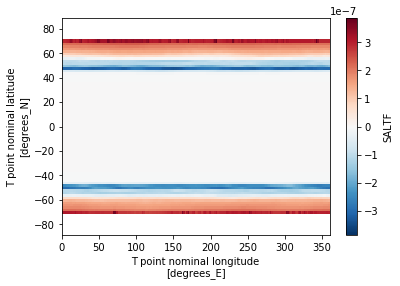

In [10]:
dice.HI.mean(dim='time').plot(cmap='Blues_r'); plt.show()

dice.SALTF.mean(dim='time').plot(); plt.show()

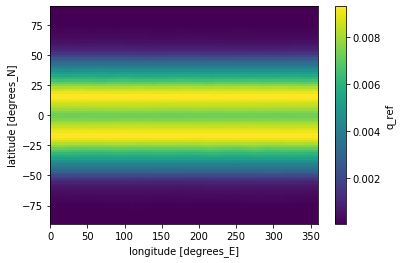

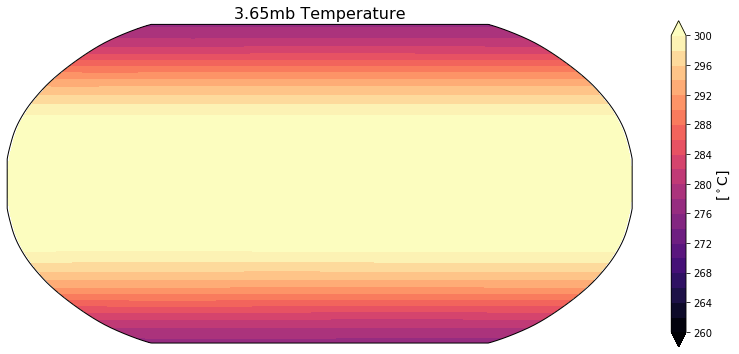

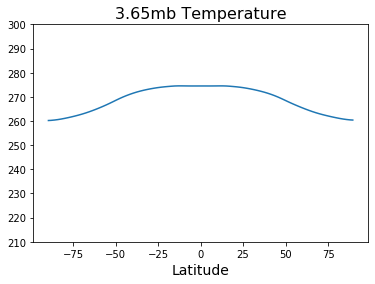

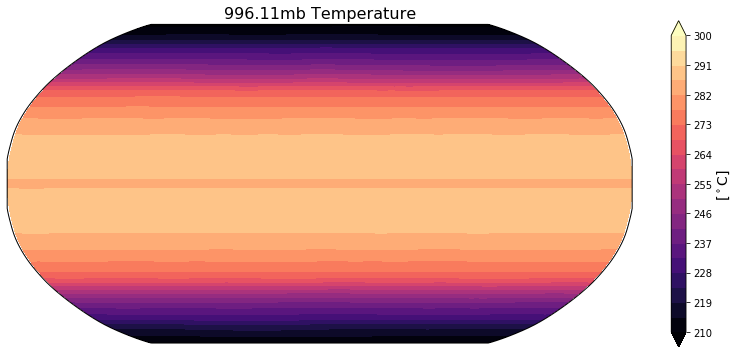

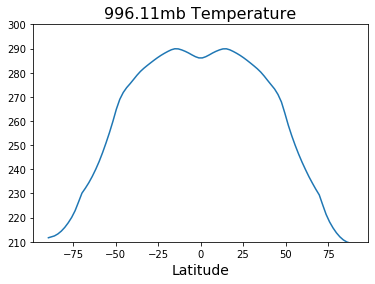

In [31]:
d_atmos.q_ref.mean(dim='time').plot(); plt.show()

b = np.linspace(260, 300, 21, endpoint=True)
t = np.linspace(260, 300, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=0).mean(dim='time'), b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('3.65mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=1).mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean 3.65mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylim([210,300])
plt.show()

b = np.linspace(210, 300, 21, endpoint=True)
t = np.linspace(210, 300, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time'), b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('996.11mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean 996.11mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylim([210,300])
plt.show()

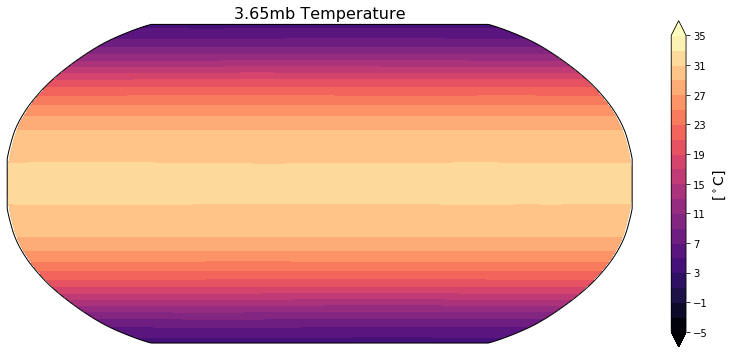

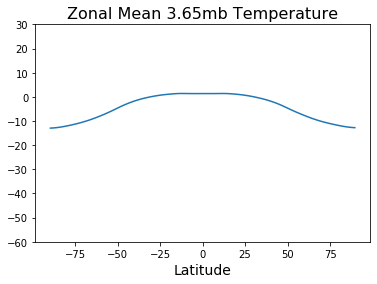

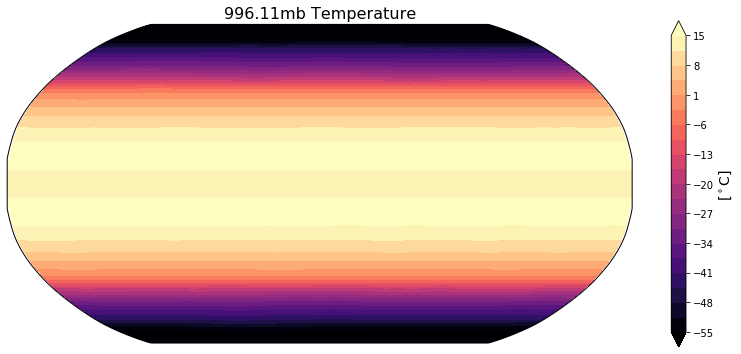

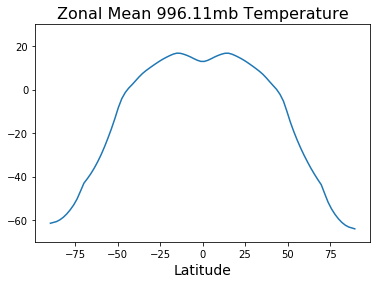

In [39]:
b = np.linspace(-5, 35, 21, endpoint=True)
t = np.linspace(-5, 35, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=0).mean(dim='time')-273.15, b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('3.65mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=1).mean(dim='time').mean(dim='lon')-273.15)
plt.title('Zonal Mean 3.65mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylim([-60,30])
plt.show()

b = np.linspace(-55, 15, 21, endpoint=True)
t = np.linspace(-55, 15, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time')-273.15, b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('996.11mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time').mean(dim='lon')-273.15)
plt.title('Zonal Mean 996.11mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylim([-70,30])
plt.show()

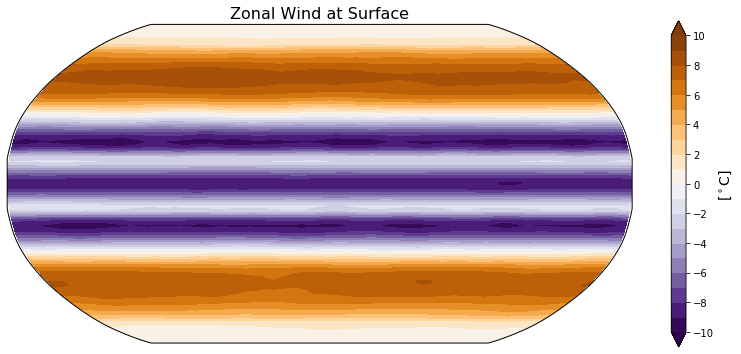

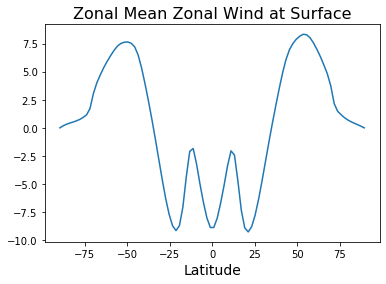

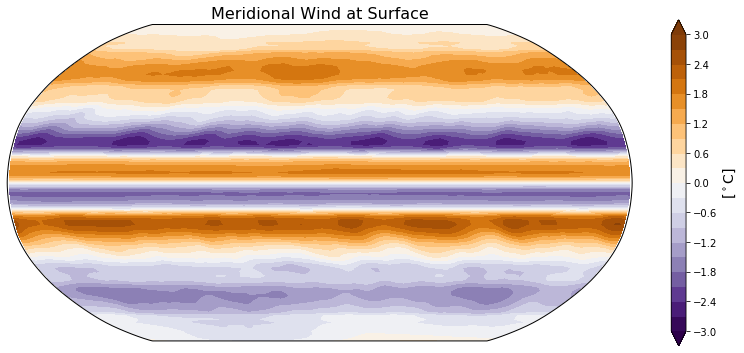

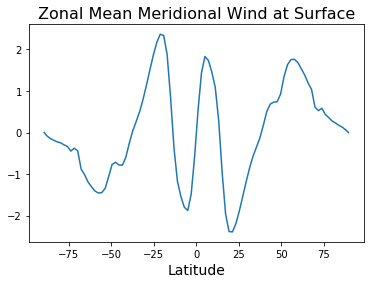

In [35]:
b = np.linspace(-10, 10, 21, endpoint=True)
t = np.linspace(-10, 10, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_flux.lon, d_flux.lat, d_flux.u_atm.mean(dim='time'), b, 
         cmap='PuOr_r', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Zonal Wind at Surface', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_flux.lat, d_flux.u_atm.mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean Zonal Wind at Surface', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([210,300])
plt.show()


b = np.linspace(-3, 3, 21, endpoint=True)
t = np.linspace(-3, 3, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_flux.lon, d_flux.lat, d_flux.v_atm.mean(dim='time'), b, 
         cmap='PuOr_r', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Meridional Wind at Surface', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_flux.lat, d_flux.v_atm.mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean Meridional Wind at Surface', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([210,300])
plt.show()

In [17]:
d_flux.u_atm

<xarray.DataArray 'u_atm' (time: 120, lat: 90, lon: 144)>
array([[[ 0.803681,  0.760574, ...,  0.885159,  0.845236],
        [ 0.996964,  0.939883, ...,  1.086574,  1.045614],
        ...,
        [-0.134711, -0.131746, ..., -0.135865, -0.136237],
        [-0.767501, -0.758004, ..., -0.78188 , -0.775468]],

       [[-0.185154, -0.233821, ..., -0.086995, -0.136181],
        [-0.654481, -0.736369, ..., -0.495088, -0.573919],
        ...,
        [ 0.535243,  0.5272  , ...,  0.57001 ,  0.549454],
        [ 0.182577,  0.153836, ...,  0.239067,  0.211004]],

       ...,

       [[-0.636897, -0.694069, ..., -0.519207, -0.578568],
        [ 0.198355,  0.154126, ...,  0.293002,  0.245158],
        ...,
        [-0.701698, -0.688993, ..., -0.728285, -0.716745],
        [-0.686602, -0.674915, ..., -0.705764, -0.696893]],

       [[ 0.548934,  0.535687, ...,  0.572195,  0.56111 ],
        [ 0.658631,  0.654549, ...,  0.652416,  0.657732],
        ...,
        [ 0.799006,  0.854544, ...,  0.688891,  0.744506],
        [ 0.535606,  0.579978, ...,  0.443903,  0.490215]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * time     (time) object 0500-01-16 12:00:00 ... 0509-12-16 12:00:00
Attributes:
    long_name:      u wind component at btm level
    units:          m/s
    valid_range:    [-400.  400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT